### 1. 先导入yaml配置文件与args命令行参数

In [1]:
import yaml

yaml_path = r'/home/wanghaowei/cailvpan/face_anti_spoofing/CLP/configs/clp_fas_prompt_tuning_PFT.yaml'

with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

config['device'] = 'cuda:0'

### 2. 测试dataloader能否正常加载

In [2]:
from data import make_data_loader

train_loader = make_data_loader(config, train = True)
test_loader = make_data_loader(config, train = False)

train_img, _, _, train_label = next(iter(train_loader))
test_img, _, _, test_label = next(iter(test_loader))

print(f'{"train": ^15}img size:{train_img.shape}   label:{train_label}')
print(f'{"test": ^15}img size:{test_img.shape}   label:{test_label}')

/home/wanghaowei/miniconda3/envs/teg/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Source Domain
casia [real:150  fake:450]

Target Domain
replay [real:130  fake:690]
     train     img size:torch.Size([8, 3, 224, 224])   label:tensor([0, 0, 0, 0, 1, 1, 0, 0])
     test      img size:torch.Size([8, 3, 224, 224])   label:tensor([1, 1, 1, 1, 1, 1, 1, 1])


### 3. 测试dataloader出来图片是否正常

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Rev_Aug test_img1')

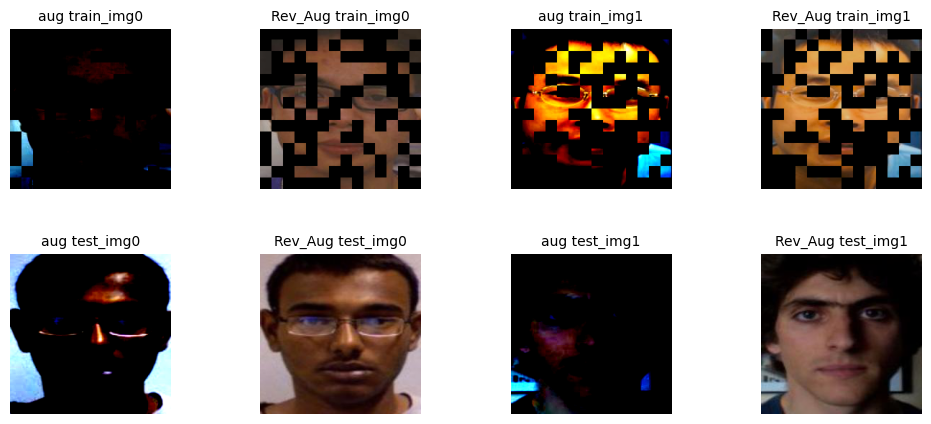

In [3]:
import torch
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from torchvision import transforms
response = requests.get("https://www.ee.cityu.edu.hk/~lmpo/lenna/len_std.jpg")

mean = config['transforms']['mean']
std = config['transforms']['std']

# 定义一个反标准化的转换
unnormalize = transforms.Normalize(
    mean=[- m / s for m, s in zip(mean, std)], 
    std=[1 / s for s in std]
)

def unnormalize_tensor(tensor):
    """
    将经过标准化处理的图像张量反向转换回原始图像张量
    :param tensor: 经过transforms.Normalize处理的图像张量
    :return: 反向转换回的原始图像张量
    """
    # 反标准化
    tensor_unnorm = unnormalize(tensor)
    # 裁剪张量值到[0, 1]之间，因为在可视化或保存为图片时需要确保数据在正确的范围内
    tensor_clipped = torch.clamp(tensor_unnorm, 0, 1)
    return tensor_clipped

plt.figure(figsize=(12, 5))  # 设置窗口尺寸
plt.subplots_adjust(wspace = 0.4, hspace = 0.4)  # 子图之间的间距，值为相对于子图宽高的比例

plt.subplot(2, 4, 1)
plt.axis('off')
plt.imshow(train_img[0].transpose(0, 1).transpose(1, 2))
plt.title('aug train_img0', fontsize = 10)

plt.subplot(2, 4, 2)
plt.axis('off')
plt.imshow(unnormalize_tensor(train_img[0]).transpose(0, 1).transpose(1, 2))
plt.title(f'Rev_Aug train_img0', fontsize = 10)

plt.subplot(2, 4, 3)
plt.axis('off')
plt.imshow(train_img[1].transpose(0, 1).transpose(1, 2))
plt.title('aug train_img1', fontsize = 10)

plt.subplot(2, 4, 4)
plt.axis('off')
plt.imshow(unnormalize_tensor(train_img[1]).transpose(0, 1).transpose(1, 2))
plt.title(f'Rev_Aug train_img1', fontsize = 10)

plt.subplot(2, 4, 5)
plt.axis('off')
plt.imshow(test_img[0].transpose(0, 1).transpose(1, 2))
plt.title('aug test_img0', fontsize = 10)

plt.subplot(2, 4, 6)
plt.axis('off')
plt.imshow(unnormalize_tensor(test_img[0]).transpose(0, 1).transpose(1, 2))
plt.title(f'Rev_Aug test_img0', fontsize = 10)

plt.subplot(2, 4, 7)
plt.axis('off')
plt.imshow(test_img[1].transpose(0, 1).transpose(1, 2))
plt.title('aug test_img1', fontsize = 10)

plt.subplot(2, 4, 8)
plt.axis('off')
plt.imshow(unnormalize_tensor(test_img[1]).transpose(0, 1).transpose(1, 2))
plt.title(f'Rev_Aug test_img1', fontsize = 10)

In [83]:
import torch, random

a = torch.randn(size = (1, 6))
print(a)

top3_values, top3_indices_row = torch.topk(a, 3, dim = 1)

# Creating a bool tensor for row-wise top 3 values
top3_bool_row = torch.zeros_like(a, dtype=torch.bool)
for i in range(top3_indices_row.size(0)):
    top3_bool_row[i, top3_indices_row[i]] = True

print(top3_bool_row)

tensor([[ 1.4915,  2.3213, -2.0142,  0.5331, -0.2413,  0.1987]])
tensor([[ True,  True, False,  True, False, False]])


### 4. 模型导入与查看模型各层名称及参数

In [4]:
from modeling import build_model

model = build_model(config)

# print(model)

Turning off gradients in both the image and the text encoder


In [5]:
class loss():
    def __init__(self, recuciton = None):
        print(ffdf)


import yaml

yaml_path = r'/home/wanghaowei/cailvpan/face_anti_spoofing/CLP/configs/clp_fas_prompt_tuning_Test.yaml'
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

L = loss(**config['loss_1']['params'])


FileNotFoundError: [Errno 2] No such file or directory: '/home/wanghaowei/cailvpan/face_anti_spoofing/CLP/configs/clp_fas_prompt_tuning_Test.yaml'

In [ ]:
from torch import nn

mlp = nn.Sequential(
            nn.Linear(in_dim, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, mlp_dim),
            nn.BatchNorm1d(mlp_dim),
            nn.ReLU(),
            nn.Linear(mlp_dim, out_dim)
        )

In [14]:
import pickle, torch

# 定义你的元素向量
a = [[[1, 2], [3, 4]], [torch.tensor([5, 6]), [7, 8]]]

# 打开一个文件用于存储数据
with open('vector.pkl', 'wb') as file:
    # 使用pickle将数据序列化并存储到文件中
    pickle.dump(a, file)


In [11]:
import pickle, torch

# 打开存储数据的文件
with open('/home/wanghaowei/cailvpan/face_anti_spoofing/CLP/op_dir/pft_c_i_20240330-163325_random_insert_text_0.7/total_mask_ratio.pkl', 'rb') as file:
    # 使用pickle读取并反序列化数据
    loaded_vector = pickle.load(file)

a = torch.tensor(loaded_vector)

print(a.shape)

torch.Size([5, 5001, 12, 8])


In [12]:
b = a.to(torch.int)

i_mask_ratio = b[1][28 * 100] / 196.0
print(i_mask_ratio.mean(dim = -1))

tensor([0.4962, 0.4860, 0.4885, 0.4930, 0.4872, 0.4866, 0.4981, 0.4872, 0.4923,
        0.4892, 0.4968, 0.4828])
